# Lab 1 Analysis Example using Thicket

In [1]:
!pip install llnl-thicket

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.7/261.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.9 MB/s eta 0:00:00


In [2]:
# import sys
# sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
# sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

<IPython.core.display.Javascript object>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

## modify this to whatever directory you saved this file and the data in
%cd /content/drive/My Drive/thicket-practice/

Mounted at /content/drive
/content/drive/My Drive/thicket-practice


Read in all the files

In [74]:
tk = th.Thicket.from_caliperreader(glob("sample_cuda_cali/*.cali"))
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time"], axis=1)
#tk.dataframe = tk.dataframe.drop(["spot.channel", "Total time"], axis=1)

In [75]:
# Performance data
tk.dataframe

Min time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              65078486         0.792919   
                                                  72403572        32.725061   
                                                  80016717        37.184711   
                                                  90049603        31.129980   
                                                  115077181        0.737729   
                                                  125227238        0.959492   
                                                  137308169        0.818102   
                                                  137607339        1.280531   
                                                  148778201        0.881069   
                                                  216948538        0.971602   
                                                  251711868       38.279861   
                                                  266170566       38.289706   
                                                  269224674       33.211975   
                                                  270725471       32.642569   
                                                  329976737        0.988714   
                                                  339141224        1.142345   
                                                  424407448        0.839657   
                                                  442774529       32.559991   
                                                  446311367        1.158003   
                                                  559361418        0.941411   
                                                  600899952       31.710783   
                                                  616562239        0.973419   
                                                  696288279        1.262646   
                                                  710945515       32.960439   
                                                  738930821        1.012910   
                                                  780318809        1.063281   
                                                  802939945        0.821033   
                                                  830689314        1.160746   
                                                  843552138        0.679387   
                                                  883734136       37.998450   
                                                  973057072        1.248635   
                                                  1023109489       1.105964   
                                                  1027556886      31.222760   
                                                  1127058510       1.189743   
                                                  1132470891      32.442312   
                                                  1176230579       0.727854   
                                                  1186553554      32.509567   
                                                  1243787906       1.199671   
                                                  1247555494      31.209127   
                                                  1272497484      31.290931   
                                                  1283656556       1.116397   
                                                  1312421486       0.762741   
                                                  1458245915      32.416376   
                                                  1461693116       1.135038   
                                                  1539137818       1.626935   
                                                  1566541052       1.013454   
                                                  1581063087      31.540706   
                                                  1584940134      31.068970   
                                                  1605395322       0.786442   
                                 

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [76]:
tk.statsframe.dataframe["time"]= 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.1

1.000 main
├─ 1.000 comm
│  └─ 1.000 comm_large
│     └─ 1.000 cudaMemcpy
├─ 1.000 comp
│  ├─ 1.000 comp_large
│  └─ 1.000 comp_small
├─ 1.000 correctness_check
└─ 1.000 data_init



In [77]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,num_blocks,group_num,implementation_source,correctness_check
profile,,,,,,,,,,,,,,,,,,,,,,,,,,
65078486,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t64-v65536-s0.cali,1701564190,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 64, 65536, 0]",g,SampleSort,CUDA,float,4,65536,sorted,0,64,1024,14,Handwritten,success
72403572,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t512-v67108864-s3.cali,1701562395,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 512, 67108864, 3]",g,SampleSort,CUDA,float,4,67108864,random,0,512,131072,14,Handwritten,success
80016717,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t128-v268435456-s3.cali,1701562395,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 128, 268435456, 3]",g,SampleSort,CUDA,float,4,268435456,random,0,128,2097152,14,Handwritten,success
90049603,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t512-v67108864-s0.cali,1701562306,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 512, 67108864, 0]",g,SampleSort,CUDA,float,4,67108864,sorted,0,512,131072,14,Handwritten,success
115077181,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t64-v65536-s1.cali,1701564205,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 64, 65536, 1]",g,SampleSort,CUDA,float,4,65536,reversed,0,64,1024,14,Handwritten,success
125227238,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t1024-v1048576-s1.cali,1701562092,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 1024, 1048576, 1]",g,SampleSort,CUDA,float,4,1048576,reversed,0,1024,1024,14,Handwritten,success
137308169,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t128-v4194304-s3.cali,1701562149,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 128, 4194304, 3]",g,SampleSort,CUDA,float,4,4194304,random,0,128,32768,14,Handwritten,success
137607339,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t256-v65536-s0.cali,1701564205,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 256, 65536, 0]",g,SampleSort,CUDA,float,4,65536,sorted,0,256,256,14,Handwritten,success
148778201,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t1024-v16777216-s1.cali,1701562331,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 1024, 16777216, 1]",g,SampleSort,CUDA,float,4,16777216,reversed,0,1024,16384,14,Handwritten,success


In [78]:
gb = tk.groupby("InputSize")
print(gb.keys())
allthickets = list(gb.values())
# input2048 = gb[2048].groupby("InputType")
# input4096 = gb[4096].groupby("InputType")
# input8192 = gb[8192].groupby("InputType")
# input16384 = gb[16384].groupby("InputType")
# input32768 = gb[32768].groupby("InputType")
input65536 = gb[65536].groupby("InputType")
input262144 = gb[262144].groupby("InputType")
input1048576 = gb[1048576].groupby("InputType")
input4194304 = gb[4194304].groupby("InputType")
input16777216 = gb[16777216].groupby("InputType")
input67108864 = gb[67108864].groupby("InputType")
input268435456 = gb[268435456].groupby("InputType")


7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x781ed81dea70>, 262144: <thicket.thicket.Thicket object at 0x781ed81dc3d0>, 1048576: <thicket.thicket.Thicket object at 0x781ed818dc90>, 4194304: <thicket.thicket.Thicket object at 0x781ed818e980>, 16777216: <thicket.thicket.Thicket object at 0x781ee0b67970>, 67108864: <thicket.thicket.Thicket object at 0x781ee1319030>, 268435456: <thicket.thicket.Thicket object at 0x781ee0b64c70>}
dict_keys([65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456])
4  thickets created...
{'1 perturbed': <thicket.thicket.Thicket object at 0x781ed81143d0>, 'random': <thicket.thicket.Thicket object at 0x781ed8117bb0>, 'reversed': <thicket.thicket.Thicket object at 0x781ee0b66980>, 'sorted': <thicket.thicket.Thicket object at 0x781ed831cac0>}
4  thickets created...
{'1 perturbed': <thicket.thicket.Thicket object at 0x781ee132f700>, 'random': <thicket.thicket.Thicket object at 0x781ed81413c0>, 'reversed': <thicket.thicket.Thicket obj

Compose these 3 groups column-wise to get a holistic view of the data

In [79]:
# ctk2048 = th.Thicket.concat_thickets(
#     thickets=list(input2048.values()),
#     headers=list(input2048.keys()),
#     axis="columns",
#     metadata_key="num_threads"
# )

# ctk4096 = th.Thicket.concat_thickets(
#     thickets=list(input4096.values()),
#     headers=list(input4096.keys()),
#     axis="columns",
#     metadata_key="num_threads"
# )

# ctk8192 = th.Thicket.concat_thickets(
#     thickets=list(input8192.values()),
#     headers=list(input8192.keys()),
#     axis="columns",
#     metadata_key="num_threads"
# )


# ctk16384 = th.Thicket.concat_thickets(
#     thickets=list(input16384.values()),
#     headers=list(input16384.keys()),
#     axis="columns",
#     metadata_key="num_threads"
# )

# ctk32768 = th.Thicket.concat_thickets(
#     thickets=list(input32768.values()),
#     headers=list(input32768.keys()),
#     axis="columns",
#     metadata_key="num_threads"
# )

ctk65536 = th.Thicket.concat_thickets(
    thickets=list(input65536.values()),
    headers=list(input65536.keys()),
    axis="columns",
    metadata_key="num_threads"
)

ctk262144 = th.Thicket.concat_thickets(
    thickets=list(input262144.values()),
    headers=list(input262144.keys()),
    axis="columns",
    metadata_key="num_threads"
)

ctk1048576 = th.Thicket.concat_thickets(
    thickets=list(input1048576.values()),
    headers=list(input1048576.keys()),
    axis="columns",
    metadata_key="num_threads"
)

ctk4194304 = th.Thicket.concat_thickets(
    thickets=list(input4194304.values()),
    headers=list(input4194304.keys()),
    axis="columns",
    metadata_key="num_threads"
)
ctk16777216 = th.Thicket.concat_thickets(
    thickets=list(input16777216.values()),
    headers=list(input16777216.keys()),
    axis="columns",
    metadata_key="num_threads"
)
ctk67108864 = th.Thicket.concat_thickets(
    thickets=list(input67108864.values()),
    headers=list(input67108864.keys()),
    axis="columns",
    metadata_key="num_threads"
)
ctk268435456 = th.Thicket.concat_thickets(
    thickets=list(input268435456.values()),
    headers=list(input268435456.keys()),
    axis="columns",
    metadata_key="num_threads"
)



allctk = []
# allctk.append(ctk2048)
# allctk.append(ctk4096)
# allctk.append(ctk8192)
# allctk.append(ctk16384)
# allctk.append(ctk32768)
allctk.append(ctk65536)
allctk.append(ctk262144)
allctk.append(ctk1048576)
allctk.append(ctk4194304)
allctk.append(ctk16777216)
allctk.append(ctk67108864)
allctk.append(ctk268435456)

In [80]:
for ctk in allctk:
    display(ctk.dataframe)

1 perturbed  \
                                                              Min time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function'}              64               1.248635   
                                                  128              1.242247   
                                                  256              0.732062   
                                                  512              0.959893   
                                                  1024             0.735487   
{'name': 'comm', 'type': 'function'}              64               0.621906   
                                                  128              0.611629   
                                                  256              0.386126   
                                                  512              0.573895   
                                                  1024             0.353302   
{'name': 'comm_large', 'type': 'function'}        64               0.621751   
                                                  128              0.611482   
                                                  256              0.386027   
                                                  512              0.573796   
                                                  1024             0.353199   
{'name': 'cudaMemcpy', 'type': 'function'}        64               0.621592   
                                                  128              0.611341   
                                                  256              0.385936   
                                                  512              0.573709   
                                                  1024             0.353105   
{'name': 'comp', 'type': 'function'}              64               0.000695   
                                                  128              0.002070   
                                                  256              0.005838   
                                                  512              0.017670   
                                                  1024             0.056961   
{'name': 'comp_large', 'type': 'function'}        64               0.000041   
                                                  128              0.000041   
                                                  256              0.000021   
                                                  512              0.000018   
                                                  1024             0.000021   
{'name': 'comp_small', 'type': 'function'}        64               0.000532   
                                                  128              0.001908   
                                                  256              0.005748   
                                                  512              0.017584   
                                                  1024             0.056862   
{'name': 'correctness_check', 'type': 'function'} 64               0.000555   
                                                  128              0.000552   
                                                  256              0.000228   
                                                  512              0.000237   
                                                  1024             0.000198   
{'name': 'data_init', 'type': 'function'}         64               0.002271   
                                                  128              0.001902   
                                                  256              0.001588   
                                                  512              0.001552   
                                                  1024             0.001601   

                                                                             \
                                                              Max time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function

1 perturbed  \
                                                              Min time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function'}              64               0.751892   
                                                  128              0.760015   
                                                  256              1.199671   
                                                  512              0.660852   
                                                  1024             1.188964   
{'name': 'comm', 'type': 'function'}              64               0.408590   
                                                  128              0.430614   
                                                  256              0.822007   
                                                  512              0.321009   
                                                  1024             0.516431   
{'name': 'comm_large', 'type': 'function'}        64               0.408437   
                                                  128              0.430463   
                                                  256              0.821901   
                                                  512              0.320917   
                                                  1024             0.516317   
{'name': 'cudaMemcpy', 'type': 'function'}        64               0.408262   
                                                  128              0.430315   
                                                  256              0.821796   
                                                  512              0.320842   
                                                  1024             0.516221   
{'name': 'comp', 'type': 'function'}              64               0.000629   
                                                  128              0.002091   
                                                  256              0.006687   
                                                  512              0.012942   
                                                  1024             0.055767   
{'name': 'comp_large', 'type': 'function'}        64               0.000042   
                                                  128              0.000041   
                                                  256              0.000024   
                                                  512              0.000019   
                                                  1024             0.000018   
{'name': 'comp_small', 'type': 'function'}        64               0.000468   
                                                  128              0.001928   
                                                  256              0.006582   
                                                  512              0.012859   
                                                  1024             0.055646   
{'name': 'correctness_check', 'type': 'function'} 64               0.002123   
                                                  128              0.001657   
                                                  256              0.000882   
                                                  512              0.000881   
                                                  1024             0.000833   
{'name': 'data_init', 'type': 'function'}         64               0.006144   
                                                  128              0.006242   
                                                  256              0.006327   
                                                  512              0.006178   
                                                  1024             0.006332   

                                                                             \
                                                              Max time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function

1 perturbed  \
                                                              Min time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function'}              64               1.081500   
                                                  128              0.840638   
                                                  256              0.741152   
                                                  512              0.760433   
                                                  1024             0.781413   
{'name': 'comm', 'type': 'function'}              64               0.443064   
                                                  128              0.473301   
                                                  256              0.391089   
                                                  512              0.398806   
                                                  1024             0.375182   
{'name': 'comm_large', 'type': 'function'}        64               0.442919   
                                                  128              0.473151   
                                                  256              0.390987   
                                                  512              0.398706   
                                                  1024             0.375072   
{'name': 'cudaMemcpy', 'type': 'function'}        64               0.442775   
                                                  128              0.473004   
                                                  256              0.390887   
                                                  512              0.398608   
                                                  1024             0.374969   
{'name': 'comp', 'type': 'function'}              64               0.000622   
                                                  128              0.002098   
                                                  256              0.003746   
                                                  512              0.014847   
                                                  1024             0.054262   
{'name': 'comp_large', 'type': 'function'}        64               0.000042   
                                                  128              0.000041   
                                                  256              0.000022   
                                                  512              0.000020   
                                                  1024             0.000020   
{'name': 'comp_small', 'type': 'function'}        64               0.000463   
                                                  128              0.001937   
                                                  256              0.003651   
                                                  512              0.014755   
                                                  1024             0.054157   
{'name': 'correctness_check', 'type': 'function'} 64               0.005411   
                                                  128              0.003341   
                                                  256              0.003141   
                                                  512              0.002852   
                                                  1024             0.003068   
{'name': 'data_init', 'type': 'function'}         64               0.024458   
                                                  128              0.024191   
                                                  256              0.024514   
                                                  512              0.024156   
                                                  1024             0.024131   

                                                                             \
                                                              Max time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function

1 perturbed  \
                                                              Min time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function'}              64               1.259044   
                                                  128              0.813784   
                                                  256              1.160942   
                                                  512              1.051725   
                                                  1024             0.898045   
{'name': 'comm', 'type': 'function'}              64               0.781560   
                                                  128              0.374265   
                                                  256              0.445315   
                                                  512              0.320033   
                                                  1024             0.388630   
{'name': 'comm_large', 'type': 'function'}        64               0.781398   
                                                  128              0.374114   
                                                  256              0.445219   
                                                  512              0.319927   
                                                  1024             0.388524   
{'name': 'cudaMemcpy', 'type': 'function'}        64               0.781241   
                                                  128              0.373969   
                                                  256              0.445125   
                                                  512              0.319845   
                                                  1024             0.388421   
{'name': 'comp', 'type': 'function'}              64               0.000650   
                                                  128              0.002060   
                                                  256              0.005107   
                                                  512              0.012977   
                                                  1024             0.058404   
{'name': 'comp_large', 'type': 'function'}        64               0.000043   
                                                  128              0.000042   
                                                  256              0.000019   
                                                  512              0.000018   
                                                  1024             0.000025   
{'name': 'comp_small', 'type': 'function'}        64               0.000484   
                                                  128              0.001899   
                                                  256              0.005018   
                                                  512              0.012894   
                                                  1024             0.058279   
{'name': 'correctness_check', 'type': 'function'} 64               0.012094   
                                                  128              0.012812   
                                                  256              0.011153   
                                                  512              0.011229   
                                                  1024             0.010888   
{'name': 'data_init', 'type': 'function'}         64               0.097342   
                                                  128              0.097060   
                                                  256              0.097746   
                                                  512              0.097774   
                                                  1024             0.097031   

                                                                             \
                                                              Max time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function

1 perturbed  \
                                                              Min time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function'}              64              31.209127   
                                                  128             31.108555   
                                                  256              1.262646   
                                                  512              1.167458   
                                                  1024             1.319428   
{'name': 'comm', 'type': 'function'}              64              30.432256   
                                                  128             30.346310   
                                                  256              0.493107   
                                                  512              0.387878   
                                                  1024             0.499756   
{'name': 'comm_large', 'type': 'function'}        64              30.432111   
                                                  128             30.346141   
                                                  256              0.493008   
                                                  512              0.387766   
                                                  1024             0.499658   
{'name': 'cudaMemcpy', 'type': 'function'}        64              30.431932   
                                                  128             30.345973   
                                                  256              0.492910   
                                                  512              0.387662   
                                                  1024             0.499565   
{'name': 'comp', 'type': 'function'}              64               0.000598   
                                                  128              0.002044   
                                                  256              0.005077   
                                                  512              0.018951   
                                                  1024             0.058544   
{'name': 'comp_large', 'type': 'function'}        64               0.000043   
                                                  128              0.000046   
                                                  256              0.000018   
                                                  512              0.000020   
                                                  1024             0.000019   
{'name': 'comp_small', 'type': 'function'}        64               0.000441   
                                                  128              0.001874   
                                                  256              0.004988   
                                                  512              0.018848   
                                                  1024             0.058451   
{'name': 'correctness_check', 'type': 'function'} 64               0.044038   
                                                  128              0.043485   
                                                  256              0.043540   
                                                  512              0.043620   
                                                  1024             0.043371   
{'name': 'data_init', 'type': 'function'}         64               0.389078   
                                                  128              0.389751   
                                                  256              0.389074   
                                                  512              0.389425   
                                                  1024             0.388972   

                                                                             \
                                                              Max time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function

1 perturbed  \
                                                              Min time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function'}              64              32.659697   
                                                  128             32.642569   
                                                  256             32.509567   
                                                  512             32.614075   
                                                  1024            32.666906   
{'name': 'comm', 'type': 'function'}              64              30.553003   
                                                  128             30.583062   
                                                  256             30.446473   
                                                  512             30.536235   
                                                  1024            30.551386   
{'name': 'comm_large', 'type': 'function'}        64              30.552858   
                                                  128             30.582908   
                                                  256             30.446361   
                                                  512             30.536135   
                                                  1024            30.551281   
{'name': 'cudaMemcpy', 'type': 'function'}        64              30.552702   
                                                  128             30.582734   
                                                  256             30.446229   
                                                  512             30.536016   
                                                  1024            30.551149   
{'name': 'comp', 'type': 'function'}              64               0.000693   
                                                  128              0.002159   
                                                  256              0.004095   
                                                  512              0.013727   
                                                  1024             0.056753   
{'name': 'comp_large', 'type': 'function'}        64               0.000046   
                                                  128              0.000064   
                                                  256              0.000032   
                                                  512              0.000030   
                                                  1024             0.000036   
{'name': 'comp_small', 'type': 'function'}        64               0.000510   
                                                  128              0.001971   
                                                  256              0.003989   
                                                  512              0.013622   
                                                  1024             0.056632   
{'name': 'correctness_check', 'type': 'function'} 64               0.176319   
                                                  128              0.176060   
                                                  256              0.173095   
                                                  512              0.172718   
                                                  1024             0.172697   
{'name': 'data_init', 'type': 'function'}         64               1.555681   
                                                  128              1.555430   
                                                  256              1.556790   
                                                  512              1.556012   
                                                  1024             1.557725   

                                                                             \
                                                              Max time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function

1 perturbed  \
                                                              Min time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function'}              64              37.909286   
                                                  128             37.998450   
                                                  256             38.289706   
                                                  512             38.279861   
                                                  1024            38.327869   
{'name': 'comm', 'type': 'function'}              64              30.668884   
                                                  128             30.724130   
                                                  256             31.037570   
                                                  512             31.019917   
                                                  1024            30.975389   
{'name': 'comm_large', 'type': 'function'}        64              30.668725   
                                                  128             30.723962   
                                                  256             31.037462   
                                                  512             31.019813   
                                                  1024            30.975278   
{'name': 'cudaMemcpy', 'type': 'function'}        64              30.668567   
                                                  128             30.723767   
                                                  256             31.037350   
                                                  512             31.019712   
                                                  1024            30.975167   
{'name': 'comp', 'type': 'function'}              64               0.000689   
                                                  128              0.002075   
                                                  256              0.005170   
                                                  512              0.013763   
                                                  1024             0.056803   
{'name': 'comp_large', 'type': 'function'}        64               0.000048   
                                                  128              0.000041   
                                                  256              0.000025   
                                                  512              0.000022   
                                                  1024             0.000021   
{'name': 'comp_small', 'type': 'function'}        64               0.000483   
                                                  128              0.001909   
                                                  256              0.005049   
                                                  512              0.013652   
                                                  1024             0.056690   
{'name': 'correctness_check', 'type': 'function'} 64               0.690637   
                                                  128              0.693645   
                                                  256              0.689541   
                                                  512              0.689543   
                                                  1024             0.689476   
{'name': 'data_init', 'type': 'function'}         64               6.225867   
                                                  128              6.234793   
                                                  256              6.230271   
                                                  512              6.229305   
                                                  1024             6.227401   

                                                                             \
                                                              Max time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function

Perform pandas operations to get the table in a desirable format for plotting

In [81]:
for ctk in allctk:
    # Drop unwanted columns
    columns_to_drop = [("node", ""), ("index", ""),]
    ctk.dataframe = ctk.dataframe.reset_index().drop(columns_to_drop, axis=1, errors='ignore')
    # Rename index to remove tuple
    ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

In [82]:
for ctk in allctk:
    display(ctk.dataframe)

1 perturbed                              \
                              Min time/rank Max time/rank Avg time/rank   
name              num_threads                                             
main              64               1.248635      1.248635      1.248635   
                  128              1.242247      1.242247      1.242247   
                  256              0.732062      0.732062      0.732062   
                  512              0.959893      0.959893      0.959893   
                  1024             0.735487      0.735487      0.735487   
comm              64               0.621906      0.621906      0.621906   
                  128              0.611629      0.611629      0.611629   
                  256              0.386126      0.386126      0.386126   
                  512              0.573895      0.573895      0.573895   
                  1024             0.353302      0.353302      0.353302   
comm_large        64               0.621751      0.621751      0.621751   
                  128              0.611482      0.611482      0.611482   
                  256              0.386027      0.386027      0.386027   
                  512              0.573796      0.573796      0.573796   
                  1024             0.353199      0.353199      0.353199   
cudaMemcpy        64               0.621592      0.621592      0.621592   
                  128              0.611341      0.611341      0.611341   
                  256              0.385936      0.385936      0.385936   
                  512              0.573709      0.573709      0.573709   
                  1024             0.353105      0.353105      0.353105   
comp              64               0.000695      0.000695      0.000695   
                  128              0.002070      0.002070      0.002070   
                  256              0.005838      0.005838      0.005838   
                  512              0.017670      0.017670      0.017670   
                  1024             0.056961      0.056961      0.056961   
comp_large        64               0.000041      0.000041      0.000041   
                  128              0.000041      0.000041      0.000041   
                  256              0.000021      0.000021      0.000021   
                  512              0.000018      0.000018      0.000018   
                  1024             0.000021      0.000021      0.000021   
comp_small        64               0.000532      0.000532      0.000532   
                  128              0.001908      0.001908      0.001908   
                  256              0.005748      0.005748      0.005748   
                  512              0.017584      0.017584      0.017584   
                  1024             0.056862      0.056862      0.056862   
correctness_check 64               0.000555      0.000555      0.000555   
                  128              0.000552      0.000552      0.000552   
                  256              0.000228      0.000228      0.000228   
                  512              0.000237      0.000237      0.000237   
                  1024             0.000198      0.000198      0.000198   
data_init         64               0.002271      0.002271      0.002271   
                  128              0.001902      0.001902      0.001902   
                  256              0.001588      0.001588      0.001588   
                  512              0.001552      0.001552      0.001552   
                  1024             0.001601      0.001601      0.001601   

                                     random                              \
                              Min time/rank Max time/rank Avg time/rank   
name              num_threads                                             
main              64               0.801358      0.801358      0.801358   
                  128              0.720604      0.720604      0.720604   
                  256              0.725096      0.72509

1 perturbed                              \
                              Min time/rank Max time/rank Avg time/rank   
name              num_threads                                             
main              64               0.751892      0.751892      0.751892   
                  128              0.760015      0.760015      0.760015   
                  256              1.199671      1.199671      1.199671   
                  512              0.660852      0.660852      0.660852   
                  1024             1.188964      1.188964      1.188964   
comm              64               0.408590      0.408590      0.408590   
                  128              0.430614      0.430614      0.430614   
                  256              0.822007      0.822007      0.822007   
                  512              0.321009      0.321009      0.321009   
                  1024             0.516431      0.516431      0.516431   
comm_large        64               0.408437      0.408437      0.408437   
                  128              0.430463      0.430463      0.430463   
                  256              0.821901      0.821901      0.821901   
                  512              0.320917      0.320917      0.320917   
                  1024             0.516317      0.516317      0.516317   
cudaMemcpy        64               0.408262      0.408262      0.408262   
                  128              0.430315      0.430315      0.430315   
                  256              0.821796      0.821796      0.821796   
                  512              0.320842      0.320842      0.320842   
                  1024             0.516221      0.516221      0.516221   
comp              64               0.000629      0.000629      0.000629   
                  128              0.002091      0.002091      0.002091   
                  256              0.006687      0.006687      0.006687   
                  512              0.012942      0.012942      0.012942   
                  1024             0.055767      0.055767      0.055767   
comp_large        64               0.000042      0.000042      0.000042   
                  128              0.000041      0.000041      0.000041   
                  256              0.000024      0.000024      0.000024   
                  512              0.000019      0.000019      0.000019   
                  1024             0.000018      0.000018      0.000018   
comp_small        64               0.000468      0.000468      0.000468   
                  128              0.001928      0.001928      0.001928   
                  256              0.006582      0.006582      0.006582   
                  512              0.012859      0.012859      0.012859   
                  1024             0.055646      0.055646      0.055646   
correctness_check 64               0.002123      0.002123      0.002123   
                  128              0.001657      0.001657      0.001657   
                  256              0.000882      0.000882      0.000882   
                  512              0.000881      0.000881      0.000881   
                  1024             0.000833      0.000833      0.000833   
data_init         64               0.006144      0.006144      0.006144   
                  128              0.006242      0.006242      0.006242   
                  256              0.006327      0.006327      0.006327   
                  512              0.006178      0.006178      0.006178   
                  1024             0.006332      0.006332      0.006332   

                                     random                              \
                              Min time/rank Max time/rank Avg time/rank   
name              num_threads                                             
main              64               0.693620      0.693620      0.693620   
                  128              0.709326      0.709326      0.709326   
                  256              1.105964      1.10596

1 perturbed                              \
                              Min time/rank Max time/rank Avg time/rank   
name              num_threads                                             
main              64               1.081500      1.081500      1.081500   
                  128              0.840638      0.840638      0.840638   
                  256              0.741152      0.741152      0.741152   
                  512              0.760433      0.760433      0.760433   
                  1024             0.781413      0.781413      0.781413   
comm              64               0.443064      0.443064      0.443064   
                  128              0.473301      0.473301      0.473301   
                  256              0.391089      0.391089      0.391089   
                  512              0.398806      0.398806      0.398806   
                  1024             0.375182      0.375182      0.375182   
comm_large        64               0.442919      0.442919      0.442919   
                  128              0.473151      0.473151      0.473151   
                  256              0.390987      0.390987      0.390987   
                  512              0.398706      0.398706      0.398706   
                  1024             0.375072      0.375072      0.375072   
cudaMemcpy        64               0.442775      0.442775      0.442775   
                  128              0.473004      0.473004      0.473004   
                  256              0.390887      0.390887      0.390887   
                  512              0.398608      0.398608      0.398608   
                  1024             0.374969      0.374969      0.374969   
comp              64               0.000622      0.000622      0.000622   
                  128              0.002098      0.002098      0.002098   
                  256              0.003746      0.003746      0.003746   
                  512              0.014847      0.014847      0.014847   
                  1024             0.054262      0.054262      0.054262   
comp_large        64               0.000042      0.000042      0.000042   
                  128              0.000041      0.000041      0.000041   
                  256              0.000022      0.000022      0.000022   
                  512              0.000020      0.000020      0.000020   
                  1024             0.000020      0.000020      0.000020   
comp_small        64               0.000463      0.000463      0.000463   
                  128              0.001937      0.001937      0.001937   
                  256              0.003651      0.003651      0.003651   
                  512              0.014755      0.014755      0.014755   
                  1024             0.054157      0.054157      0.054157   
correctness_check 64               0.005411      0.005411      0.005411   
                  128              0.003341      0.003341      0.003341   
                  256              0.003141      0.003141      0.003141   
                  512              0.002852      0.002852      0.002852   
                  1024             0.003068      0.003068      0.003068   
data_init         64               0.024458      0.024458      0.024458   
                  128              0.024191      0.024191      0.024191   
                  256              0.024514      0.024514      0.024514   
                  512              0.024156      0.024156      0.024156   
                  1024             0.024131      0.024131      0.024131   

                                     random                              \
                              Min time/rank Max time/rank Avg time/rank   
name              num_threads                                             
main              64               1.109186      1.109186      1.109186   
                  128              1.144368      1.144368      1.144368   
                  256              0.767206      0.76720

1 perturbed                              \
                              Min time/rank Max time/rank Avg time/rank   
name              num_threads                                             
main              64               1.259044      1.259044      1.259044   
                  128              0.813784      0.813784      0.813784   
                  256              1.160942      1.160942      1.160942   
                  512              1.051725      1.051725      1.051725   
                  1024             0.898045      0.898045      0.898045   
comm              64               0.781560      0.781560      0.781560   
                  128              0.374265      0.374265      0.374265   
                  256              0.445315      0.445315      0.445315   
                  512              0.320033      0.320033      0.320033   
                  1024             0.388630      0.388630      0.388630   
comm_large        64               0.781398      0.781398      0.781398   
                  128              0.374114      0.374114      0.374114   
                  256              0.445219      0.445219      0.445219   
                  512              0.319927      0.319927      0.319927   
                  1024             0.388524      0.388524      0.388524   
cudaMemcpy        64               0.781241      0.781241      0.781241   
                  128              0.373969      0.373969      0.373969   
                  256              0.445125      0.445125      0.445125   
                  512              0.319845      0.319845      0.319845   
                  1024             0.388421      0.388421      0.388421   
comp              64               0.000650      0.000650      0.000650   
                  128              0.002060      0.002060      0.002060   
                  256              0.005107      0.005107      0.005107   
                  512              0.012977      0.012977      0.012977   
                  1024             0.058404      0.058404      0.058404   
comp_large        64               0.000043      0.000043      0.000043   
                  128              0.000042      0.000042      0.000042   
                  256              0.000019      0.000019      0.000019   
                  512              0.000018      0.000018      0.000018   
                  1024             0.000025      0.000025      0.000025   
comp_small        64               0.000484      0.000484      0.000484   
                  128              0.001899      0.001899      0.001899   
                  256              0.005018      0.005018      0.005018   
                  512              0.012894      0.012894      0.012894   
                  1024             0.058279      0.058279      0.058279   
correctness_check 64               0.012094      0.012094      0.012094   
                  128              0.012812      0.012812      0.012812   
                  256              0.011153      0.011153      0.011153   
                  512              0.011229      0.011229      0.011229   
                  1024             0.010888      0.010888      0.010888   
data_init         64               0.097342      0.097342      0.097342   
                  128              0.097060      0.097060      0.097060   
                  256              0.097746      0.097746      0.097746   
                  512              0.097774      0.097774      0.097774   
                  1024             0.097031      0.097031      0.097031   

                                     random                              \
                              Min time/rank Max time/rank Avg time/rank   
name              num_threads                                             
main              64              30.805235     30.805235     30.805235   
                  128              0.818102      0.818102      0.818102   
                  256              1.135038      1.13503

1 perturbed                              \
                              Min time/rank Max time/rank Avg time/rank   
name              num_threads                                             
main              64              31.209127     31.209127     31.209127   
                  128             31.108555     31.108555     31.108555   
                  256              1.262646      1.262646      1.262646   
                  512              1.167458      1.167458      1.167458   
                  1024             1.319428      1.319428      1.319428   
comm              64              30.432256     30.432256     30.432256   
                  128             30.346310     30.346310     30.346310   
                  256              0.493107      0.493107      0.493107   
                  512              0.387878      0.387878      0.387878   
                  1024             0.499756      0.499756      0.499756   
comm_large        64              30.432111     30.432111     30.432111   
                  128             30.346141     30.346141     30.346141   
                  256              0.493008      0.493008      0.493008   
                  512              0.387766      0.387766      0.387766   
                  1024             0.499658      0.499658      0.499658   
cudaMemcpy        64              30.431932     30.431932     30.431932   
                  128             30.345973     30.345973     30.345973   
                  256              0.492910      0.492910      0.492910   
                  512              0.387662      0.387662      0.387662   
                  1024             0.499565      0.499565      0.499565   
comp              64               0.000598      0.000598      0.000598   
                  128              0.002044      0.002044      0.002044   
                  256              0.005077      0.005077      0.005077   
                  512              0.018951      0.018951      0.018951   
                  1024             0.058544      0.058544      0.058544   
comp_large        64               0.000043      0.000043      0.000043   
                  128              0.000046      0.000046      0.000046   
                  256              0.000018      0.000018      0.000018   
                  512              0.000020      0.000020      0.000020   
                  1024             0.000019      0.000019      0.000019   
comp_small        64               0.000441      0.000441      0.000441   
                  128              0.001874      0.001874      0.001874   
                  256              0.004988      0.004988      0.004988   
                  512              0.018848      0.018848      0.018848   
                  1024             0.058451      0.058451      0.058451   
correctness_check 64               0.044038      0.044038      0.044038   
                  128              0.043485      0.043485      0.043485   
                  256              0.043540      0.043540      0.043540   
                  512              0.043620      0.043620      0.043620   
                  1024             0.043371      0.043371      0.043371   
data_init         64               0.389078      0.389078      0.389078   
                  128              0.389751      0.389751      0.389751   
                  256              0.389074      0.389074      0.389074   
                  512              0.389425      0.389425      0.389425   
                  1024             0.388972      0.388972      0.388972   

                                     random                              \
                              Min time/rank Max time/rank Avg time/rank   
name              num_threads                                             
main              64              31.100779     31.100779     31.100779   
                  128             31.187710     31.187710     31.187710   
                  256              1.037426      1.03742

1 perturbed                              \
                              Min time/rank Max time/rank Avg time/rank   
name              num_threads                                             
main              64              32.659697     32.659697     32.659697   
                  128             32.642569     32.642569     32.642569   
                  256             32.509567     32.509567     32.509567   
                  512             32.614075     32.614075     32.614075   
                  1024            32.666906     32.666906     32.666906   
comm              64              30.553003     30.553003     30.553003   
                  128             30.583062     30.583062     30.583062   
                  256             30.446473     30.446473     30.446473   
                  512             30.536235     30.536235     30.536235   
                  1024            30.551386     30.551386     30.551386   
comm_large        64              30.552858     30.552858     30.552858   
                  128             30.582908     30.582908     30.582908   
                  256             30.446361     30.446361     30.446361   
                  512             30.536135     30.536135     30.536135   
                  1024            30.551281     30.551281     30.551281   
cudaMemcpy        64              30.552702     30.552702     30.552702   
                  128             30.582734     30.582734     30.582734   
                  256             30.446229     30.446229     30.446229   
                  512             30.536016     30.536016     30.536016   
                  1024            30.551149     30.551149     30.551149   
comp              64               0.000693      0.000693      0.000693   
                  128              0.002159      0.002159      0.002159   
                  256              0.004095      0.004095      0.004095   
                  512              0.013727      0.013727      0.013727   
                  1024             0.056753      0.056753      0.056753   
comp_large        64               0.000046      0.000046      0.000046   
                  128              0.000064      0.000064      0.000064   
                  256              0.000032      0.000032      0.000032   
                  512              0.000030      0.000030      0.000030   
                  1024             0.000036      0.000036      0.000036   
comp_small        64               0.000510      0.000510      0.000510   
                  128              0.001971      0.001971      0.001971   
                  256              0.003989      0.003989      0.003989   
                  512              0.013622      0.013622      0.013622   
                  1024             0.056632      0.056632      0.056632   
correctness_check 64               0.176319      0.176319      0.176319   
                  128              0.176060      0.176060      0.176060   
                  256              0.173095      0.173095      0.173095   
                  512              0.172718      0.172718      0.172718   
                  1024             0.172697      0.172697      0.172697   
data_init         64               1.555681      1.555681      1.555681   
                  128              1.555430      1.555430      1.555430   
                  256              1.556790      1.556790      1.556790   
                  512              1.556012      1.556012      1.556012   
                  1024             1.557725      1.557725      1.557725   

                                     random                              \
                              Min time/rank Max time/rank Avg time/rank   
name              num_threads                                             
main              64              32.416376     32.416376     32.416376   
                  128             32.559991     32.559991     32.559991   
                  256             32.442312     32.44231

1 perturbed                              \
                              Min time/rank Max time/rank Avg time/rank   
name              num_threads                                             
main              64              37.909286     37.909286     37.909286   
                  128             37.998450     37.998450     37.998450   
                  256             38.289706     38.289706     38.289706   
                  512             38.279861     38.279861     38.279861   
                  1024            38.327869     38.327869     38.327869   
comm              64              30.668884     30.668884     30.668884   
                  128             30.724130     30.724130     30.724130   
                  256             31.037570     31.037570     31.037570   
                  512             31.019917     31.019917     31.019917   
                  1024            30.975389     30.975389     30.975389   
comm_large        64              30.668725     30.668725     30.668725   
                  128             30.723962     30.723962     30.723962   
                  256             31.037462     31.037462     31.037462   
                  512             31.019813     31.019813     31.019813   
                  1024            30.975278     30.975278     30.975278   
cudaMemcpy        64              30.668567     30.668567     30.668567   
                  128             30.723767     30.723767     30.723767   
                  256             31.037350     31.037350     31.037350   
                  512             31.019712     31.019712     31.019712   
                  1024            30.975167     30.975167     30.975167   
comp              64               0.000689      0.000689      0.000689   
                  128              0.002075      0.002075      0.002075   
                  256              0.005170      0.005170      0.005170   
                  512              0.013763      0.013763      0.013763   
                  1024             0.056803      0.056803      0.056803   
comp_large        64               0.000048      0.000048      0.000048   
                  128              0.000041      0.000041      0.000041   
                  256              0.000025      0.000025      0.000025   
                  512              0.000022      0.000022      0.000022   
                  1024             0.000021      0.000021      0.000021   
comp_small        64               0.000483      0.000483      0.000483   
                  128              0.001909      0.001909      0.001909   
                  256              0.005049      0.005049      0.005049   
                  512              0.013652      0.013652      0.013652   
                  1024             0.056690      0.056690      0.056690   
correctness_check 64               0.690637      0.690637      0.690637   
                  128              0.693645      0.693645      0.693645   
                  256              0.689541      0.689541      0.689541   
                  512              0.689543      0.689543      0.689543   
                  1024             0.689476      0.689476      0.689476   
data_init         64               6.225867      6.225867      6.225867   
                  128              6.234793      6.234793      6.234793   
                  256              6.230271      6.230271      6.230271   
                  512              6.229305      6.229305      6.229305   
                  1024             6.227401      6.227401      6.227401   

                                     random                              \
                              Min time/rank Max time/rank Avg time/rank   
name              num_threads                                             
main              64              37.154879     37.154879     37.154879   
                  128             37.184711     37.184711     37.184711   
                  256             37.308700     37.30870

In [83]:
# Define common variables
threads = sorted(list(set(allctk[0].dataframe.index.get_level_values("num_threads"))))
# threads = [64, 128, 256, 512, 1024]

In [84]:
# Drop unwanted columns
for ctk in allctk:
    columns_to_drop = [('1 perturbed',     'Min time/rank'),
            ('1 perturbed',     'Max time/rank'),
            ('1 perturbed', 'Avg GPU time/rank'),
            ('1 perturbed', 'Min GPU time/rank'),
            ('1 perturbed', 'Max GPU time/rank'),
            ('1 perturbed',    'Total GPU time'),
            ( 'random',     'Min time/rank'),
            ( 'random',     'Max time/rank'),
            ( 'random', 'Avg GPU time/rank'),
            ( 'random', 'Min GPU time/rank'),
            ( 'random', 'Max GPU time/rank'),
            ( 'random',    'Total GPU time'),
            ( 'reversed',     'Min time/rank'),
            ( 'reversed',     'Max time/rank'),
            ( 'reversed', 'Avg GPU time/rank'),
            ( 'reversed', 'Min GPU time/rank'),
            ( 'reversed', 'Max GPU time/rank'),
            ( 'reversed',    'Total GPU time'),
            ( 'sorted',     'Min time/rank'),
            ( 'sorted',     'Max time/rank'),
            ( 'sorted', 'Avg GPU time/rank'),
            ( 'sorted', 'Min GPU time/rank'),
            ( 'sorted', 'Max GPU time/rank'),
            ( 'sorted',    'Total GPU time'),
                       ]
    ctk.dataframe = ctk.dataframe.drop(columns_to_drop, axis=1, errors='ignore')
    #function_names = sorted(ctk.dataframe.columns.tolist())


In [85]:
for ctk in allctk:
    display(ctk.metadata)

1 perturbed  \
            cali.caliper.version   
num_threads                        
64                    2.11.0-dev   
128                   2.11.0-dev   
256                   2.11.0-dev   
512                   2.11.0-dev   
1024                  2.11.0-dev   

                                                                \
                                                  spot.metrics   
num_threads                                                      
64           min#inclusive#sum#time.duration,max#inclusive#...   
128          min#inclusive#sum#time.duration,max#inclusive#...   
256          min#inclusive#sum#time.duration,max#inclusive#...   
512          min#inclusive#sum#time.duration,max#inclusive#...   
1024         min#inclusive#sum#time.duration,max#inclusive#...   

                                                         \
            spot.timeseries.metrics spot.format.version   
num_threads                                               
64                                                    2   
128                                                   2   
256                                                   2   
512                                                   2   
1024                                                  2   

                                                                  \
                        spot.options  spot.channels cali.channel   
num_threads                                                        
64           cuda.gputime,node.order  regionprofile         spot   
128          cuda.gputime,node.order  regionprofile         spot   
256          cuda.gputime,node.order  regionprofile         spot   
512          cuda.gputime,node.order  regionprofile         spot   
1024         cuda.gputime,node.order  regionprofile         spot   

                                                                     \
            spot:cuda.gputime spot:node.order           spot:output   
num_threads                                                           
64                       true            true    t64-v65536-s2.cali   
128                      true            true   t128-v65536-s2.cali   
256                      true            true   t256-v65536-s2.cali   
512                      true            true   t512-v65536-s2.cali   
1024                     true            true  t1024-v65536-s2.cali   

                                                                            \
             launchdate                                          libraries   
num_threads                                                                  
64           1701564212  [/scratch/group/csce435-f23/Caliper/caliper/li...   
128          1701564212  [/scratch/group/csce435-f23/Caliper/caliper/li...   
256          1701564233  [/scratch/group/csce435-f23/Caliper/caliper/li...   
512          1701564233  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1024         1701564233  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                              \
                                cmdline cluster   Algorithm ProgrammingModel   
num_threads                                                                    
64             [./sample, 64, 65536, 2]       g  SampleSort             CUDA   
128           [./sample, 128, 65536, 2]       g  SampleSort             CUDA   
256           [./sample, 256, 65536, 2]       g  SampleSort             CUDA   
512           [./sample, 512, 65536, 2]       g  SampleSort             CUDA   
1024         [./sample, 1024, 65536, 2]       g  SampleSort             CUDA   

                                                                      \
            Datatype SizeOfDatatype InputSize    InputType num_procs   
num_threads                                                            
64             float              4     65536  1 perturbed         0   
128            float              4     65536  1 perturbed    

1 perturbed  \
            cali.caliper.version   
num_threads                        
64                    2.11.0-dev   
128                   2.11.0-dev   
256                   2.11.0-dev   
512                   2.11.0-dev   
1024                  2.11.0-dev   

                                                                \
                                                  spot.metrics   
num_threads                                                      
64           min#inclusive#sum#time.duration,max#inclusive#...   
128          min#inclusive#sum#time.duration,max#inclusive#...   
256          min#inclusive#sum#time.duration,max#inclusive#...   
512          min#inclusive#sum#time.duration,max#inclusive#...   
1024         min#inclusive#sum#time.duration,max#inclusive#...   

                                                         \
            spot.timeseries.metrics spot.format.version   
num_threads                                               
64                                                    2   
128                                                   2   
256                                                   2   
512                                                   2   
1024                                                  2   

                                                                  \
                        spot.options  spot.channels cali.channel   
num_threads                                                        
64           cuda.gputime,node.order  regionprofile         spot   
128          cuda.gputime,node.order  regionprofile         spot   
256          cuda.gputime,node.order  regionprofile         spot   
512          cuda.gputime,node.order  regionprofile         spot   
1024         cuda.gputime,node.order  regionprofile         spot   

                                                                      \
            spot:cuda.gputime spot:node.order            spot:output   
num_threads                                                            
64                       true            true    t64-v262144-s2.cali   
128                      true            true   t128-v262144-s2.cali   
256                      true            true   t256-v262144-s2.cali   
512                      true            true   t512-v262144-s2.cali   
1024                     true            true  t1024-v262144-s2.cali   

                                                                            \
             launchdate                                          libraries   
num_threads                                                                  
64           1701562092  [/scratch/group/csce435-f23/Caliper/caliper/li...   
128          1701562093  [/scratch/group/csce435-f23/Caliper/caliper/li...   
256          1701562109  [/scratch/group/csce435-f23/Caliper/caliper/li...   
512          1701562109  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1024         1701562109  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                               \
                                 cmdline cluster   Algorithm ProgrammingModel   
num_threads                                                                     
64             [./sample, 64, 262144, 2]       g  SampleSort             CUDA   
128           [./sample, 128, 262144, 2]       g  SampleSort             CUDA   
256           [./sample, 256, 262144, 2]       g  SampleSort             CUDA   
512           [./sample, 512, 262144, 2]       g  SampleSort             CUDA   
1024         [./sample, 1024, 262144, 2]       g  SampleSort             CUDA   

                                                                      \
            Datatype SizeOfDatatype InputSize    InputType num_procs   
num_threads                                                            
64             float              4    262144  1 perturbed         0   
128            float              4    262144 

1 perturbed  \
            cali.caliper.version   
num_threads                        
64                    2.11.0-dev   
128                   2.11.0-dev   
256                   2.11.0-dev   
512                   2.11.0-dev   
1024                  2.11.0-dev   

                                                                \
                                                  spot.metrics   
num_threads                                                      
64           min#inclusive#sum#time.duration,max#inclusive#...   
128          min#inclusive#sum#time.duration,max#inclusive#...   
256          min#inclusive#sum#time.duration,max#inclusive#...   
512          min#inclusive#sum#time.duration,max#inclusive#...   
1024         min#inclusive#sum#time.duration,max#inclusive#...   

                                                         \
            spot.timeseries.metrics spot.format.version   
num_threads                                               
64                                                    2   
128                                                   2   
256                                                   2   
512                                                   2   
1024                                                  2   

                                                                  \
                        spot.options  spot.channels cali.channel   
num_threads                                                        
64           cuda.gputime,node.order  regionprofile         spot   
128          cuda.gputime,node.order  regionprofile         spot   
256          cuda.gputime,node.order  regionprofile         spot   
512          cuda.gputime,node.order  regionprofile         spot   
1024         cuda.gputime,node.order  regionprofile         spot   

                                                                       \
            spot:cuda.gputime spot:node.order             spot:output   
num_threads                                                             
64                       true            true    t64-v1048576-s2.cali   
128                      true            true   t128-v1048576-s2.cali   
256                      true            true   t256-v1048576-s2.cali   
512                      true            true   t512-v1048576-s2.cali   
1024                     true            true  t1024-v1048576-s2.cali   

                                                                            \
             launchdate                                          libraries   
num_threads                                                                  
64           1701562109  [/scratch/group/csce435-f23/Caliper/caliper/li...   
128          1701562109  [/scratch/group/csce435-f23/Caliper/caliper/li...   
256          1701562109  [/scratch/group/csce435-f23/Caliper/caliper/li...   
512          1701562109  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1024         1701562109  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                               \
                                  cmdline cluster   Algorithm   
num_threads                                                     
64             [./sample, 64, 1048576, 2]       g  SampleSort   
128           [./sample, 128, 1048576, 2]       g  SampleSort   
256           [./sample, 256, 1048576, 2]       g  SampleSort   
512           [./sample, 512, 1048576, 2]       g  SampleSort   
1024         [./sample, 1024, 1048576, 2]       g  SampleSort   

                                                                             \
            ProgrammingModel Datatype SizeOfDatatype InputSize    InputType   
num_threads                                                                   
64                      CUDA    float              4   1048576  1 perturbed   
128                     CUDA    float              4   1048576  1 perturbed   
256                     CUDA    float              4   1048

1 perturbed  \
            cali.caliper.version   
num_threads                        
64                    2.11.0-dev   
128                   2.11.0-dev   
256                   2.11.0-dev   
512                   2.11.0-dev   
1024                  2.11.0-dev   

                                                                \
                                                  spot.metrics   
num_threads                                                      
64           min#inclusive#sum#time.duration,max#inclusive#...   
128          min#inclusive#sum#time.duration,max#inclusive#...   
256          min#inclusive#sum#time.duration,max#inclusive#...   
512          min#inclusive#sum#time.duration,max#inclusive#...   
1024         min#inclusive#sum#time.duration,max#inclusive#...   

                                                         \
            spot.timeseries.metrics spot.format.version   
num_threads                                               
64                                                    2   
128                                                   2   
256                                                   2   
512                                                   2   
1024                                                  2   

                                                                  \
                        spot.options  spot.channels cali.channel   
num_threads                                                        
64           cuda.gputime,node.order  regionprofile         spot   
128          cuda.gputime,node.order  regionprofile         spot   
256          cuda.gputime,node.order  regionprofile         spot   
512          cuda.gputime,node.order  regionprofile         spot   
1024         cuda.gputime,node.order  regionprofile         spot   

                                                                       \
            spot:cuda.gputime spot:node.order             spot:output   
num_threads                                                             
64                       true            true    t64-v4194304-s2.cali   
128                      true            true   t128-v4194304-s2.cali   
256                      true            true   t256-v4194304-s2.cali   
512                      true            true   t512-v4194304-s2.cali   
1024                     true            true  t1024-v4194304-s2.cali   

                                                                            \
             launchdate                                          libraries   
num_threads                                                                  
64           1701562124  [/scratch/group/csce435-f23/Caliper/caliper/li...   
128          1701562124  [/scratch/group/csce435-f23/Caliper/caliper/li...   
256          1701562124  [/scratch/group/csce435-f23/Caliper/caliper/li...   
512          1701562124  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1024         1701562124  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                               \
                                  cmdline cluster   Algorithm   
num_threads                                                     
64             [./sample, 64, 4194304, 2]       g  SampleSort   
128           [./sample, 128, 4194304, 2]       g  SampleSort   
256           [./sample, 256, 4194304, 2]       g  SampleSort   
512           [./sample, 512, 4194304, 2]       g  SampleSort   
1024         [./sample, 1024, 4194304, 2]       g  SampleSort   

                                                                             \
            ProgrammingModel Datatype SizeOfDatatype InputSize    InputType   
num_threads                                                                   
64                      CUDA    float              4   4194304  1 perturbed   
128                     CUDA    float              4   4194304  1 perturbed   
256                     CUDA    float              4   4194

1 perturbed  \
            cali.caliper.version   
num_threads                        
64                    2.11.0-dev   
128                   2.11.0-dev   
256                   2.11.0-dev   
512                   2.11.0-dev   
1024                  2.11.0-dev   

                                                                \
                                                  spot.metrics   
num_threads                                                      
64           min#inclusive#sum#time.duration,max#inclusive#...   
128          min#inclusive#sum#time.duration,max#inclusive#...   
256          min#inclusive#sum#time.duration,max#inclusive#...   
512          min#inclusive#sum#time.duration,max#inclusive#...   
1024         min#inclusive#sum#time.duration,max#inclusive#...   

                                                         \
            spot.timeseries.metrics spot.format.version   
num_threads                                               
64                                                    2   
128                                                   2   
256                                                   2   
512                                                   2   
1024                                                  2   

                                                                  \
                        spot.options  spot.channels cali.channel   
num_threads                                                        
64           cuda.gputime,node.order  regionprofile         spot   
128          cuda.gputime,node.order  regionprofile         spot   
256          cuda.gputime,node.order  regionprofile         spot   
512          cuda.gputime,node.order  regionprofile         spot   
1024         cuda.gputime,node.order  regionprofile         spot   

                                                                        \
            spot:cuda.gputime spot:node.order              spot:output   
num_threads                                                              
64                       true            true    t64-v16777216-s2.cali   
128                      true            true   t128-v16777216-s2.cali   
256                      true            true   t256-v16777216-s2.cali   
512                      true            true   t512-v16777216-s2.cali   
1024                     true            true  t1024-v16777216-s2.cali   

                                                                            \
             launchdate                                          libraries   
num_threads                                                                  
64           1701562350  [/scratch/group/csce435-f23/Caliper/caliper/li...   
128          1701562350  [/scratch/group/csce435-f23/Caliper/caliper/li...   
256          1701562350  [/scratch/group/csce435-f23/Caliper/caliper/li...   
512          1701562350  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1024         1701562350  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                \
                                   cmdline cluster   Algorithm   
num_threads                                                      
64             [./sample, 64, 16777216, 2]       g  SampleSort   
128           [./sample, 128, 16777216, 2]       g  SampleSort   
256           [./sample, 256, 16777216, 2]       g  SampleSort   
512           [./sample, 512, 16777216, 2]       g  SampleSort   
1024         [./sample, 1024, 16777216, 2]       g  SampleSort   

                                                                             \
            ProgrammingModel Datatype SizeOfDatatype InputSize    InputType   
num_threads                                                                   
64                      CUDA    float              4  16777216  1 perturbed   
128                     CUDA    float              4  16777216  1 perturbed   
256                     CUDA    float      

1 perturbed  \
            cali.caliper.version   
num_threads                        
64                    2.11.0-dev   
128                   2.11.0-dev   
256                   2.11.0-dev   
512                   2.11.0-dev   
1024                  2.11.0-dev   

                                                                \
                                                  spot.metrics   
num_threads                                                      
64           min#inclusive#sum#time.duration,max#inclusive#...   
128          min#inclusive#sum#time.duration,max#inclusive#...   
256          min#inclusive#sum#time.duration,max#inclusive#...   
512          min#inclusive#sum#time.duration,max#inclusive#...   
1024         min#inclusive#sum#time.duration,max#inclusive#...   

                                                         \
            spot.timeseries.metrics spot.format.version   
num_threads                                               
64                                                    2   
128                                                   2   
256                                                   2   
512                                                   2   
1024                                                  2   

                                                                  \
                        spot.options  spot.channels cali.channel   
num_threads                                                        
64           cuda.gputime,node.order  regionprofile         spot   
128          cuda.gputime,node.order  regionprofile         spot   
256          cuda.gputime,node.order  regionprofile         spot   
512          cuda.gputime,node.order  regionprofile         spot   
1024         cuda.gputime,node.order  regionprofile         spot   

                                                                        \
            spot:cuda.gputime spot:node.order              spot:output   
num_threads                                                              
64                       true            true    t64-v67108864-s2.cali   
128                      true            true   t128-v67108864-s2.cali   
256                      true            true   t256-v67108864-s2.cali   
512                      true            true   t512-v67108864-s2.cali   
1024                     true            true  t1024-v67108864-s2.cali   

                                                                            \
             launchdate                                          libraries   
num_threads                                                                  
64           1701562350  [/scratch/group/csce435-f23/Caliper/caliper/li...   
128          1701562366  [/scratch/group/csce435-f23/Caliper/caliper/li...   
256          1701562366  [/scratch/group/csce435-f23/Caliper/caliper/li...   
512          1701562366  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1024         1701562366  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                \
                                   cmdline cluster   Algorithm   
num_threads                                                      
64             [./sample, 64, 67108864, 2]       g  SampleSort   
128           [./sample, 128, 67108864, 2]       g  SampleSort   
256           [./sample, 256, 67108864, 2]       g  SampleSort   
512           [./sample, 512, 67108864, 2]       g  SampleSort   
1024         [./sample, 1024, 67108864, 2]       g  SampleSort   

                                                                             \
            ProgrammingModel Datatype SizeOfDatatype InputSize    InputType   
num_threads                                                                   
64                      CUDA    float              4  67108864  1 perturbed   
128                     CUDA    float              4  67108864  1 perturbed   
256                     CUDA    float      

1 perturbed  \
            cali.caliper.version   
num_threads                        
64                    2.11.0-dev   
128                   2.11.0-dev   
256                   2.11.0-dev   
512                   2.11.0-dev   
1024                  2.11.0-dev   

                                                                \
                                                  spot.metrics   
num_threads                                                      
64           min#inclusive#sum#time.duration,max#inclusive#...   
128          min#inclusive#sum#time.duration,max#inclusive#...   
256          min#inclusive#sum#time.duration,max#inclusive#...   
512          min#inclusive#sum#time.duration,max#inclusive#...   
1024         min#inclusive#sum#time.duration,max#inclusive#...   

                                                         \
            spot.timeseries.metrics spot.format.version   
num_threads                                               
64                                                    2   
128                                                   2   
256                                                   2   
512                                                   2   
1024                                                  2   

                                                                  \
                        spot.options  spot.channels cali.channel   
num_threads                                                        
64           cuda.gputime,node.order  regionprofile         spot   
128          cuda.gputime,node.order  regionprofile         spot   
256          cuda.gputime,node.order  regionprofile         spot   
512          cuda.gputime,node.order  regionprofile         spot   
1024         cuda.gputime,node.order  regionprofile         spot   

                                                                         \
            spot:cuda.gputime spot:node.order               spot:output   
num_threads                                                               
64                       true            true    t64-v268435456-s2.cali   
128                      true            true   t128-v268435456-s2.cali   
256                      true            true   t256-v268435456-s2.cali   
512                      true            true   t512-v268435456-s2.cali   
1024                     true            true  t1024-v268435456-s2.cali   

                                                                            \
             launchdate                                          libraries   
num_threads                                                                  
64           1701562366  [/scratch/group/csce435-f23/Caliper/caliper/li...   
128          1701562366  [/scratch/group/csce435-f23/Caliper/caliper/li...   
256          1701562367  [/scratch/group/csce435-f23/Caliper/caliper/li...   
512          1701562367  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1024         1701562373  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                 \
                                    cmdline cluster   Algorithm   
num_threads                                                       
64             [./sample, 64, 268435456, 2]       g  SampleSort   
128           [./sample, 128, 268435456, 2]       g  SampleSort   
256           [./sample, 256, 268435456, 2]       g  SampleSort   
512           [./sample, 512, 268435456, 2]       g  SampleSort   
1024         [./sample, 1024, 268435456, 2]       g  SampleSort   

                                                                              \
            ProgrammingModel Datatype SizeOfDatatype  InputSize    InputType   
num_threads                                                                    
64                      CUDA    float              4  268435456  1 perturbed   
128                     CUDA    float              4  268435456  1 perturbed   
256                   

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [65]:
def plot_pandas(df, title, xlabel, ylabel, loglog, xticks):
    plot = df.plot(kind="line",
        marker='o',
        title=title,
        xlabel=xlabel,
        ylabel=ylabel,
        grid=True,
        loglog=loglog,
    )
    plot.set_xticks(range(5), xticks)
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [30]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [31]:
def plot_mpl3(df,df1, df2, title, xlabel, ylabel, label1, label2, label3):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='<', label=label3)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [32]:
def plot_mpl2(df,df1, title, xlabel, ylabel, label1, label2):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [86]:
print(ctk.dataframe.columns)

MultiIndex([('1 perturbed', 'Avg time/rank'),
            (     'random', 'Avg time/rank'),
            (   'reversed', 'Avg time/rank'),
            (     'sorted', 'Avg time/rank')],
           )


In [87]:
regions = sorted(list(set(ctk.dataframe.index.get_level_values("name"))))
print(regions)

['comm', 'comm_large', 'comp', 'comp_large', 'comp_small', 'correctness_check', 'cudaMemcpy', 'data_init', 'main']


In [88]:
function_names = ['main', 'comp', 'comm']
xticks = [64, 128, 256, 512, 1024]

In [89]:
#print (ctk.dataframe)
ctk = allctk[0]
temp = ctk.dataframe
temp = temp.loc[['main', 'comp', 'comm']]
temp.columns = temp.columns.droplevel(level=1)
#print(temp)
#print(temp.reset_index().drop("num_procs", axis=1).set_index("name"))
temp = temp.reset_index()
#print(temp.reset_index())
#print(temp.loc[num_procs==2])
divide_df = temp[temp['num_threads'] == 64]
temp = temp.reset_index().drop("num_threads", axis=1).drop("index", axis=1).set_index("name")
divide_df = divide_df.reset_index().drop("num_threads", axis=1).drop("index", axis=1).set_index("name")
print(divide_df)
print(temp)
#speedup_df = temp.reset_index().drop("num_procs", axis=1).set_index("name")
speedup_df = divide_df/temp
print(speedup_df)

      1 perturbed    random  reversed    sorted
name                                           
main     1.248635  0.801358  0.737729  0.792919
comp     0.000695  0.000639  0.000630  0.000706
comm     0.621906  0.465879  0.411511  0.463693
      1 perturbed    random  reversed    sorted
name                                           
main     1.248635  0.801358  0.737729  0.792919
main     1.242247  0.720604  1.130948  0.728693
main     0.732062  0.725096  0.786379  1.280531
main     0.959893  1.160746  0.702389  1.158003
main     0.735487  0.860067  0.973419  0.782272
comp     0.000695  0.000639  0.000630  0.000706
comp     0.002070  0.001483  0.002090  0.001979
comp     0.005838  0.003960  0.003956  0.005500
comp     0.017670  0.014581  0.012896  0.014067
comp     0.056961  0.056074  0.055269  0.059570
comm     0.621906  0.465879  0.411511  0.463693
comm     0.611629  0.382832  0.761158  0.390246
comm     0.386126  0.395254  0.456080  0.906534
comm     0.573895  0.778181  0.357594  0

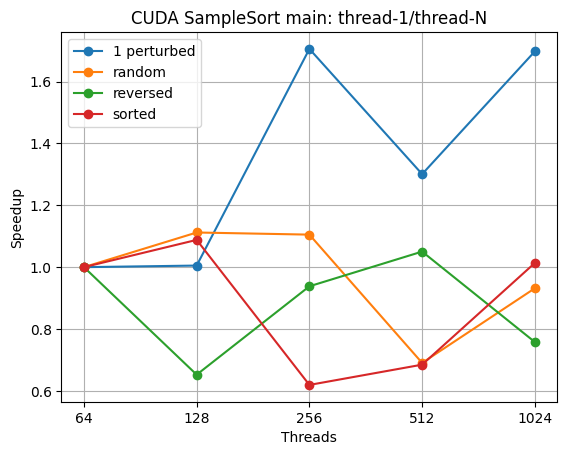

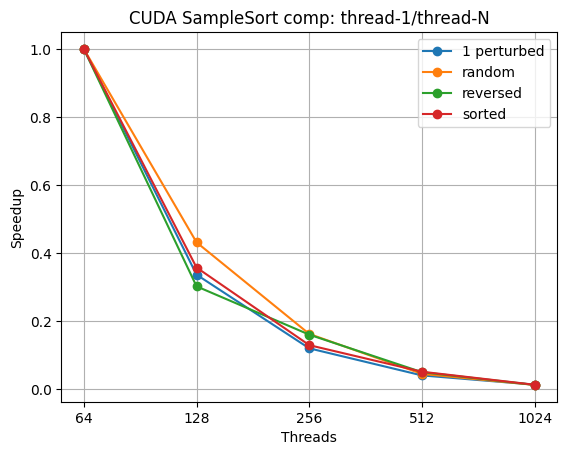

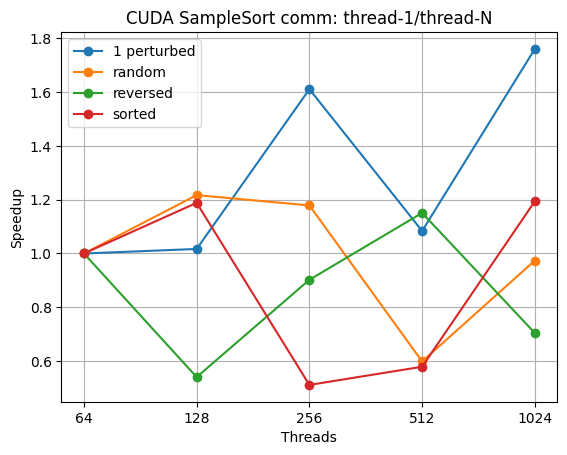

In [91]:
for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"CUDA SampleSort {name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False,
        xticks = xticks
    )